In [1]:
# imports
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
news = pd.read_csv("embeddings/news_emb_final.csv") #document with user interactions
news.head()

,ID,Category,SubCategory,Content,Content_emb
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","[0.005885085556656122, -0.007782096974551678, ..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat These seemingly ...,"[-0.004876355174928904, -0.007969613187015057,..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,"[-0.02760046347975731, -0.013719998300075531, ..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","[0.005073545966297388, 0.004160495940595865, 0..."


In [15]:
news_df = pd.read_csv("sentiment_final.csv") #document with user interactions
news_df.head()

,Unnamed: 0,ID,Category,SubCategory,Content,Content_emb,Sentiment
0,0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","[0.005885085556656122, -0.007782096974551678, ...",Positive
1,1,N19639,health,weightloss,50 Worst Habits For Belly Fat These seemingly ...,"[-0.004876355174928904, -0.007969613187015057,...",Negative
2,2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,"[-0.02760046347975731, -0.013719998300075531, ...",Negative
3,3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0...",Neutral
4,4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","[0.005073545966297388, 0.004160495940595865, 0...",Positive


In [16]:
news_df = news_df.loc[:, ~news_df.columns.str.contains('^Unnamed')]
news_df.head()

,ID,Category,SubCategory,Content,Content_emb,Sentiment
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","[0.005885085556656122, -0.007782096974551678, ...",Positive
1,N19639,health,weightloss,50 Worst Habits For Belly Fat These seemingly ...,"[-0.004876355174928904, -0.007969613187015057,...",Negative
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,"[-0.02760046347975731, -0.013719998300075531, ...",Negative
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"[-0.0297758337110281, -0.014837449416518211, 0...",Neutral
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","[0.005073545966297388, 0.004160495940595865, 0...",Positive


In [20]:
behaviors_df = pd.read_csv("MIND/behaviors_extra.tsv",sep='\t',  header=None)
behaviors_df.columns =['User', 'Time', 'ID', 'Impressions'] 
behaviors_df = behaviors_df.drop(['Time'], axis=1)
behaviors_df.head()

,User,ID,Impressions
0,U111,N61837 N39237 N9786 N43620 N61409,N7482-1 N6379-0
1,U222,N13861 N41051 N40272 N24967 N14962,N55689-1 N35729-0
2,U333,N9786 N47214 N24905 N56618 N34406,N20678-0 N39317-0 N58114-0 N20495-0
3,U444,N20336 N30961 N61765 N40969 N11472,N50014-0
4,U555,N59295 N9721 N3574 N43620 N22028,N35729-0 N33632-0 N49685-1 N27581-0


In [21]:

def generate_user_graphs(user_id, behaviors_df, news_df):
    # Get the list of articles read by the user
    user_articles = behaviors_df[behaviors_df['User'] == user_id]['ID'].str.split().explode().tolist()

    # Filter news_df based on user's articles
    user_news_df = news_df[news_df['ID'].isin(user_articles)]

    # Plot Category distribution
    category_counts = user_news_df['Category'].value_counts()
    plt.figure(figsize=(10, 5))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Category Distribution for User {}'.format(user_id))
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

    # Plot SubCategory distribution
    subcategory_counts = user_news_df['SubCategory'].value_counts()
    plt.figure(figsize=(10, 5))
    subcategory_counts.plot(kind='bar', color='lightcoral')
    plt.title('SubCategory Distribution for User {}'.format(user_id))
    plt.xlabel('SubCategory')
    plt.ylabel('Count')
    plt.show()

    # Plot Sentiment distribution
    sentiment_counts = user_news_df['Sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='lightgreen')
    plt.title('Sentiment Distribution for User {}'.format(user_id))
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


In [23]:

def generate_recommendation_graphs(n, user_id, news_df):
    recommendation_df = pd.read_csv("content_recommendations/" + user_id + "_cont.csv")
    # Take the first n rows from the recommendation dataframe
    top_n_recommendations = recommendation_df.head(n)

    # Extract the IDs from the recommendation dataframe
    recommended_ids = top_n_recommendations['ID'].tolist()

    # Filter news_df based on recommended IDs
    recommended_news_df = news_df[news_df['ID'].isin(recommended_ids)]

    # Plot Category distribution
    category_counts = recommended_news_df['Category'].value_counts()
    plt.figure(figsize=(10, 5))
    category_counts.plot(kind='bar', color='skyblue')
    plt.title('Category Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

    # Plot SubCategory distribution
    subcategory_counts = recommended_news_df['SubCategory'].value_counts()
    plt.figure(figsize=(10, 5))
    subcategory_counts.plot(kind='bar', color='lightcoral')
    plt.title('SubCategory Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('SubCategory')
    plt.ylabel('Count')
    plt.show()

    # Plot Sentiment distribution
    sentiment_counts = recommended_news_df['Sentiment'].value_counts()
    plt.figure(figsize=(8, 5))
    sentiment_counts.plot(kind='bar', color='lightgreen')
    plt.title('Sentiment Distribution for Top {} Recommendations'.format(n))
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()


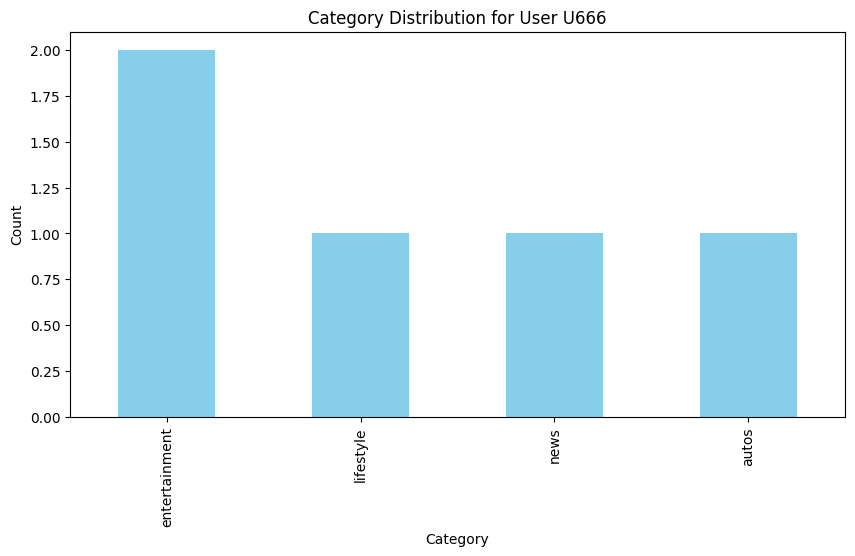

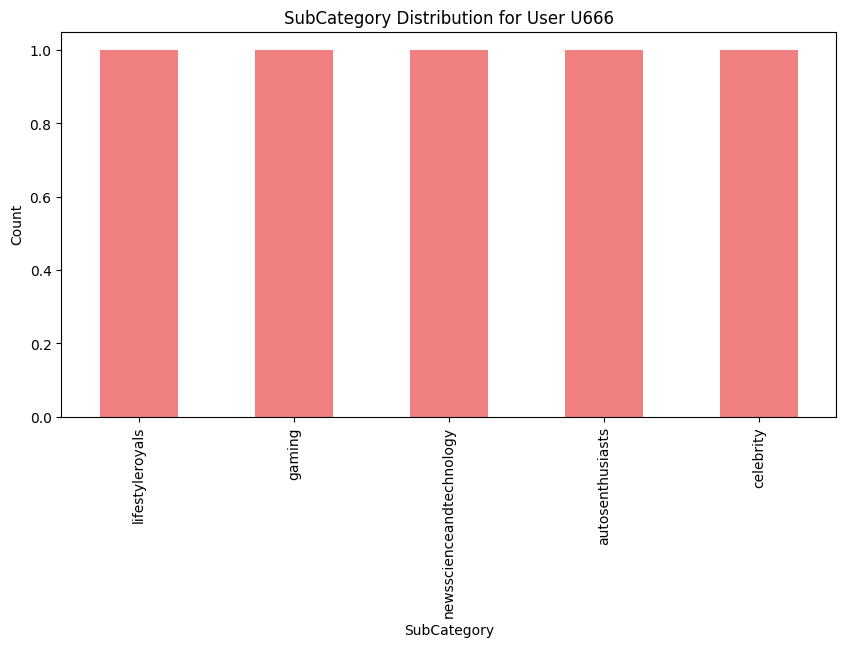

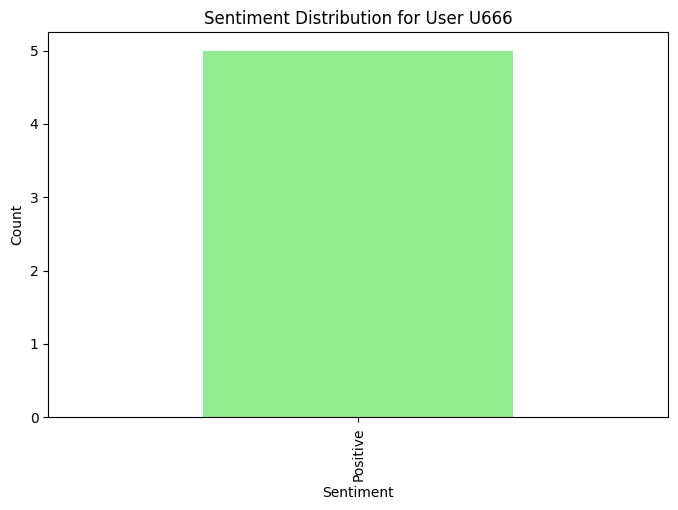

In [41]:
generate_user_graphs("U666", behaviors_df, news_df)

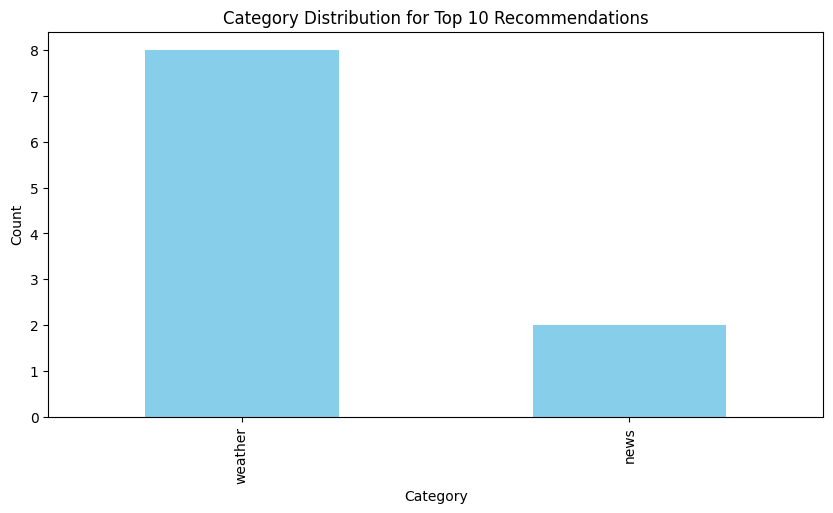

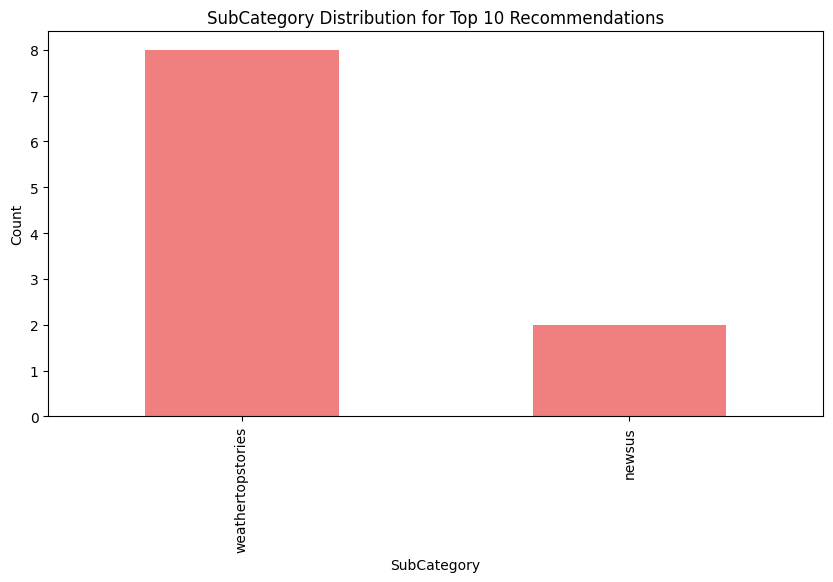

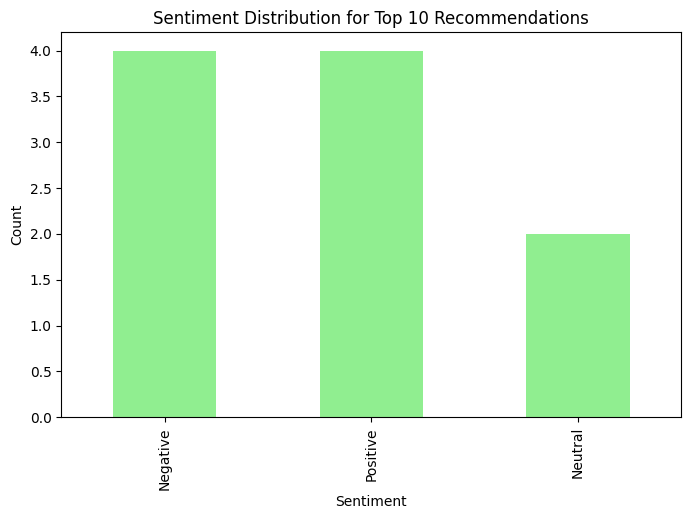

In [42]:
generate_recommendation_graphs(10, "U666", news_df)